In [2]:
import naive_bayes as nb
import util
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [3]:
folder_path_clement = 'datasets/kaggle_clement/split_files/'
folder_path_comp = 'datasets/kaggle_comp/split_files/'
train_file = 'train.csv'
test_file = 'test.csv'
save_file = 'test_pred.csv'

# Kaggle Clement Dataset

## Train Model on Dataset

In [4]:
train_X_clement, train_y_clement = util.load_dataset(folder_path_clement, train_file)
test_X_clement, test_y_clement = util.load_dataset(folder_path_clement, test_file)

In [7]:
model_cl = nb.NaiveBayesModel()
model_cl.fit(train_X_clement, train_y_clement)

## Performance on Test

In [8]:
test_pred_y_clement = model_cl.predict(test_X_clement)

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2260986d940>)

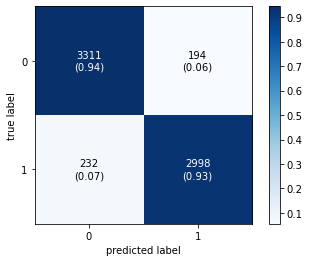

In [9]:
util.plot_conf_mat(test_y_clement, test_pred_y_clement)

In [10]:
util.print_accuracy_measures(test_y_clement, test_pred_y_clement)

Accuracy of Logistic Regression Classifier: 93.67%

CLassification Report of Logistic Regression Classifier:

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      3505
           1       0.94      0.93      0.93      3230

    accuracy                           0.94      6735
   macro avg       0.94      0.94      0.94      6735
weighted avg       0.94      0.94      0.94      6735



## Vocab Analysis

In [12]:
model = model_cl.model
vocab=model.named_steps['tfidf'].vocabulary_
coef=list(model.named_steps['nb'].feature_log_prob_[1])
top_features=[]

for i in range(300):
    k = coef.index(max(coef))
    top_features.append(k)
    coef.pop(k)

for f in top_features:
    print({k:v for k, v in vocab.items() if v == f})


{'said': 82066}
{'trumka': 95529}
{'reuters': 79693}
{'president': 74270}
{'stasi': 88922}
{'house': 45439}
{'government': 40953}
{'washed': 100739}
{'republic': 79176}
{'unisplendour': 97596}
{'statementand': 88949}
{'nevio': 65511}
{'norsworthy': 66818}
{'token': 94237}
{'china': 21342}
{'miniskirt': 61859}
{'partnerships': 70613}
{'semitism': 84154}
{'korda': 53697}
{'electing': 32457}
{'rusholme': 81610}
{'ybor': 103646}
{'taverns': 92124}
{'websiteread': 101095}
{'secularist': 83895}
{'pepto': 71464}
{'whisker': 101617}
{'thunderdome': 93587}
{'tubridy': 95881}
{'coursing': 25000}
{'penthouses': 71419}
{'clinto': 22319}
{'donahoe': 30388}
{'fricking': 38211}
{'foreground': 37500}
{'campaign': 19086}
{'rusiackas': 81611}
{'stasi': 88922}
{'monastery': 62762}
{'oath': 67597}
{'militarily': 61663}
{'democracynow': 27915}
{'preservation': 74259}
{'iq': 48884}
{'administration': 7809}
{'webs': 101090}
{'offerman': 68035}
{'commitments': 23252}
{'lavin': 55187}
{'ntknetworkbarack': 6717

# Kaggle Comp Dataset

In [13]:
folder_path = 'datasets/kaggle_comp/split_files/'

## Use Clement-Trained Model on This Dataset

In [14]:
test_X_comp, test_y_comp = util.load_dataset(folder_path_comp, test_file)
test_pred_y_cl_on_comp = model_cl.predict(test_X_comp)

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2260a6db310>)

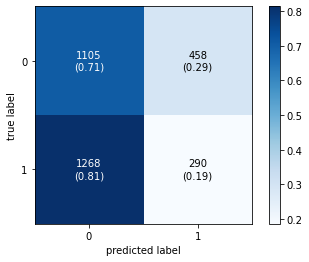

In [15]:
util.plot_conf_mat(test_y_comp, test_pred_y_cl_on_comp)

In [16]:
util.print_accuracy_measures(test_y_comp, test_pred_y_cl_on_comp)

Accuracy of Logistic Regression Classifier: 44.7%

CLassification Report of Logistic Regression Classifier:

              precision    recall  f1-score   support

           0       0.47      0.71      0.56      1563
           1       0.39      0.19      0.25      1558

    accuracy                           0.45      3121
   macro avg       0.43      0.45      0.41      3121
weighted avg       0.43      0.45      0.41      3121



## Train Model on Dataset

In [18]:
train_X_comp, train_y_comp = util.load_dataset(folder_path_comp, train_file)

In [19]:
model_cp = nb.NaiveBayesModel()
model_cp.fit(train_X_comp, train_y_comp)

In [20]:
test_pred_y_comp = model_cp.predict(test_X_comp) 

### Performance on Test

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2260a6db8b0>)

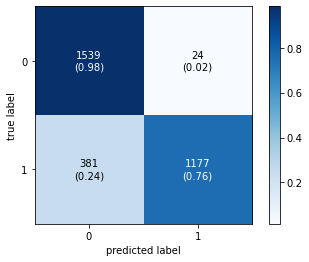

In [21]:
util.plot_conf_mat(test_y_comp, test_pred_y_comp)

In [22]:
util.print_accuracy_measures(test_y_comp, test_pred_y_comp)

Accuracy of Logistic Regression Classifier: 87.02%

CLassification Report of Logistic Regression Classifier:

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1563
           1       0.98      0.76      0.85      1558

    accuracy                           0.87      3121
   macro avg       0.89      0.87      0.87      3121
weighted avg       0.89      0.87      0.87      3121



# N Gram

In [48]:
ngram = (1, 2)

## Train Model on Comp Dataset

In [49]:
model_bigram_cp = nb.NaiveBayesModel()
model_bigram_cp.fit(train_X_comp, train_y_comp, ngram)

In [50]:
test_pred_y = model_bigram_cp.predict(test_X_comp) 

## Performance on Test

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x22673d5fe80>)

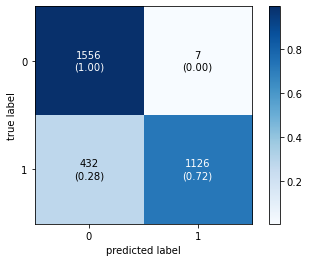

In [51]:
util.plot_conf_mat(test_y_comp, test_pred_y)

In [52]:
util.print_accuracy_measures(test_y_comp, test_pred_y)

Accuracy of Logistic Regression Classifier: 85.93%

CLassification Report of Logistic Regression Classifier:

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      1563
           1       0.99      0.72      0.84      1558

    accuracy                           0.86      3121
   macro avg       0.89      0.86      0.86      3121
weighted avg       0.89      0.86      0.86      3121



### Comparison to Basic Model on Comp Dataset

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2265b7ccee0>)

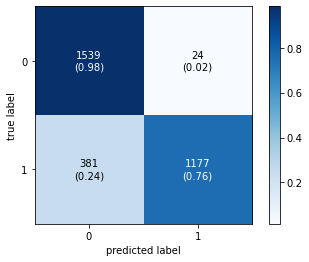

In [53]:
util.plot_conf_mat(test_y_comp, test_pred_y_comp)

In [54]:
util.print_accuracy_measures(test_y_comp, test_pred_y_comp)

Accuracy of Logistic Regression Classifier: 87.02%

CLassification Report of Logistic Regression Classifier:

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1563
           1       0.98      0.76      0.85      1558

    accuracy                           0.87      3121
   macro avg       0.89      0.87      0.87      3121
weighted avg       0.89      0.87      0.87      3121



## Train Model on Clement Dataset

In [55]:
model_bigram_cl = nb.NaiveBayesModel()
model_bigram_cl.fit(train_X_clement, train_y_clement, ngram)

## Performance on Test

In [56]:
test_pred_y = model_bigram_cl.predict(test_X_clement) 

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2284ff3d520>)

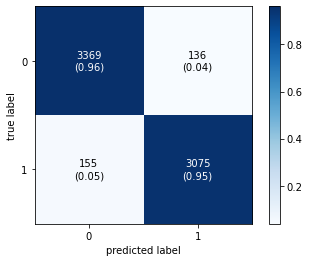

In [57]:
util.plot_conf_mat(test_y_clement, test_pred_y)

In [58]:
util.print_accuracy_measures(test_y_clement, test_pred_y)

Accuracy of Logistic Regression Classifier: 95.68%

CLassification Report of Logistic Regression Classifier:

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3505
           1       0.96      0.95      0.95      3230

    accuracy                           0.96      6735
   macro avg       0.96      0.96      0.96      6735
weighted avg       0.96      0.96      0.96      6735



### Comparison to Basic Model on Clement Dataset

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x22855fdf070>)

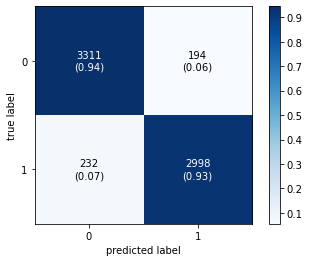

In [59]:
util.plot_conf_mat(test_y_clement, test_pred_y_clement)

In [60]:
util.print_accuracy_measures(test_y_clement, test_pred_y_clement)

Accuracy of Logistic Regression Classifier: 93.67%

CLassification Report of Logistic Regression Classifier:

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      3505
           1       0.94      0.93      0.93      3230

    accuracy                           0.94      6735
   macro avg       0.94      0.94      0.94      6735
weighted avg       0.94      0.94      0.94      6735



## Performance of Bigram Clement Model on Comp Test Dataset

In [61]:
test_pred_y = model_bigram_cl.predict(test_X_comp) 

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x22858b7bb80>)

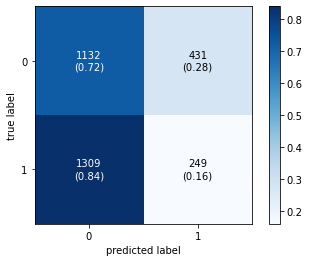

In [62]:
util.plot_conf_mat(test_y_comp, test_pred_y)

In [63]:
util.print_accuracy_measures(test_y_comp, test_pred_y)

Accuracy of Logistic Regression Classifier: 44.25%

CLassification Report of Logistic Regression Classifier:

              precision    recall  f1-score   support

           0       0.46      0.72      0.57      1563
           1       0.37      0.16      0.22      1558

    accuracy                           0.44      3121
   macro avg       0.41      0.44      0.39      3121
weighted avg       0.42      0.44      0.39      3121



### Comparison to Clement Model used on Comp Dataset

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x22859cde3d0>)

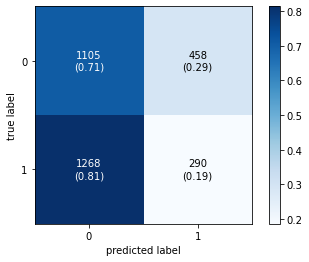

In [64]:
util.plot_conf_mat(test_y_comp, test_pred_y_cl_on_comp)

In [65]:
util.print_accuracy_measures(test_y_comp, test_pred_y_cl_on_comp)

Accuracy of Logistic Regression Classifier: 44.7%

CLassification Report of Logistic Regression Classifier:

              precision    recall  f1-score   support

           0       0.47      0.71      0.56      1563
           1       0.39      0.19      0.25      1558

    accuracy                           0.45      3121
   macro avg       0.43      0.45      0.41      3121
weighted avg       0.43      0.45      0.41      3121

